In [1]:
import pandas as pd
from pandas import read_table, DataFrame
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
import matplotlib.pylab as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

data = pd.read_csv("Robberies_classified.csv")

Y= data['crime_classification']
data = data.drop(['crime_classification'], axis=1)
cols = list(data.columns)
i = 0
Y = label_binarize(Y, classes=[0, 1, 2])
n_classes = Y.shape[1]
#Normalization of the variables
for col in cols:
    col_zscore = col + '_zscore'
    i = i+1
    data[col_zscore] = (data[col] - data[col].mean())/data[col].std(ddof=0)
     
data = data[data.columns[i:]]
X= data
X=X.fillna(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)


In [2]:
#Selecting the most important features.
classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy"))
classifier.fit(X_train, Y_train)
dataImportance= DataFrame(classifier.estimators_[1].feature_importances_, columns = ["Imp"], index = X.columns).sort(['Imp'], ascending = False)
y = dataImportance[dataImportance.Imp > 0.02]
dataImportance= DataFrame(classifier.estimators_[0].feature_importances_, columns = ["Imp"], index = X.columns).sort(['Imp'], ascending = False)
x = dataImportance[dataImportance.Imp > 0.02]
dataImportance= DataFrame(classifier.estimators_[2].feature_importances_, columns = ["Imp"], index = X.columns).sort(['Imp'], ascending = False)
z = dataImportance[dataImportance.Imp > 0.02]
y= y.append(x)
y=y.append(z)
myset = set( y.index.values)
X = X[list(myset)]
print list(myset)

['Number of Subway Stations_zscore', 'Total Population: Female: 35 to 44 Years_zscore', 'Households: $10,000 to $14,999_zscore', 'Some Other Race 16 Years Old In Civilian Labor Force: Unemployed_zscore', 'Total Population: Male: 85 Years and over_zscore', 'Median household income (In 2013 Inflation Adjusted Dollars)_zscore', 'Population Age 18 to 64 for whom poverty status  is determined: Living in Poverty_zscore', 'Households: $75,000 to $99,999_zscore', 'Workers 16 Years and over: Car, truck, or van_zscore', 'Workers 16 Years and over: Walked_zscore', 'Households:_zscore', 'Total Population: Female: 15 to 17 Years_zscore', 'Some Other Race 16 Years Old In Civilian Labor Force: Employed_zscore', 'Black or African American 16 Years Old In  Civilian Labor Force: Employed_zscore', 'Households: $100,000 to $124,999_zscore', 'Total Population: Female_zscore', 'Area (Land)_zscore', 'Population Age 18 to 64 for whom poverty status  is determined:_zscore', 'Total Population: Male_zscore', 'Ho

# Logistic Regression

0.870802305783


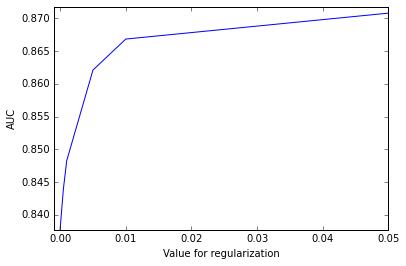

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

lr_auc=np.arange(0, 10, dtype=np.float)
c= [0.000001,0.000005,0.00001, 0.00005,  0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
i=0
for value in c: 
    #c = np.power(10.0, value)
    classifier = OneVsRestClassifier(LogisticRegression(C=value))
    y_score = classifier.fit(X_train, Y_train).decision_function(X_test)
    lr_auc[i] = np.mean(cross_validation.cross_val_score(classifier, X_test, Y_test, scoring="roc_auc"))
    i = i+1

plt.plot(c, lr_auc)
plt.ylim(min(lr_auc), max(lr_auc)+ 0.001 )  
plt.xlim(-0.001, 0.05) 
plt.xlabel("Value for regularization")
plt.ylabel("AUC")

best_c = max(lr_auc)
print best_c



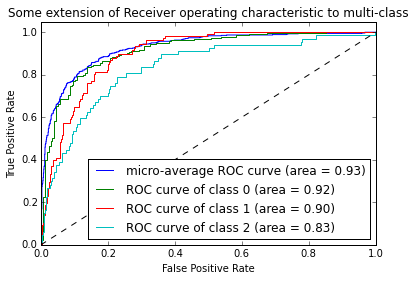

In [4]:
#Logistic Regression multiclass

classifier = OneVsRestClassifier(LogisticRegression(C=0.01))
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# SVM

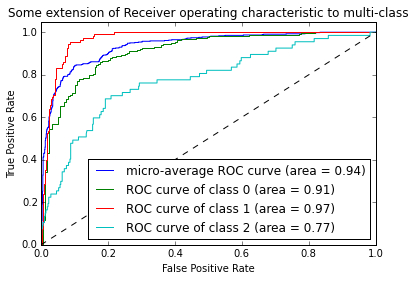

In [5]:
#SVM 
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

0.870802305783


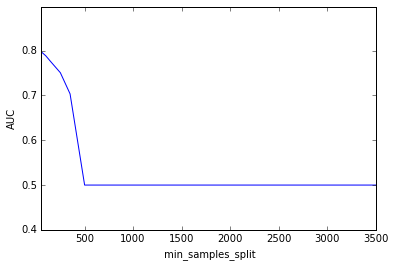

In [6]:
min_samples_split_A=[50,100,150,250,350,500,750,1500,2250,3500]
tree_auc=np.ones(10)

i = 0
for value in min_samples_split_A:
    #c = np.power(10.0, value)
    classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy", min_samples_split= value))
    tree_auc[i] = np.mean(cross_validation.cross_val_score(classifier, X_test, Y_test, scoring="roc_auc"))
    i = i+1

rects1 = plt.plot(min_samples_split_A, tree_auc)
plt.xlabel(" min_samples_split")
plt.ylabel("AUC")
plt.ylim(min(tree_auc)-0.1, max(tree_auc)+ 0.1 )  
plt.xlim(50, 3500) 

best_c = max(lr_auc)
print best_c

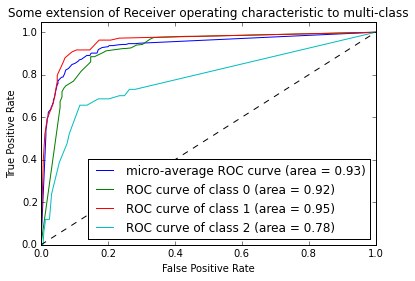

In [7]:
classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy", min_samples_split=50))
y_score = classifier.fit(X_train, Y_train).predict_proba(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

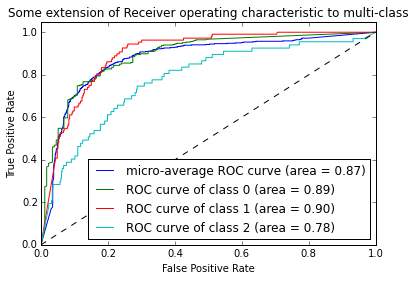

In [8]:
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train, Y_train).predict_proba(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
